<a href="https://colab.research.google.com/github/rafaelnduarte/Heart_Disease_Machine_Learning_XGBoost/blob/master/Heart_Diseases_Machine_Learning(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Diseases - Machine Learning

Heart disease is the leading cause of death in the United States, according to the [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/heartdisease/facts.htm). In the United States, 1 in every 4 deaths is the result of heart disease. That’s about 610,000 people who die from the condition each year.

<center><img src="https://image.freepik.com/free-photo/hands-holding-heart_23-2148172201.jpg"></center>

Despite being one of the main causes of death all over the world, about 90% of heart disease cases could have been prevented through simple changes in lifestyle.

There are numerous researches on Machine Learning to build new predictive models that help doctors with the diagnosis of heart diseases.

Studies published in the magazine [Nature Biomedical Engineering](https://www.nature.com/natbiomedeng/) show that Deep Learning algorithms were capable of anticipating heart diseases in up to 5 years ahead.

Unquestionably, the use of Artificial Intelligence has deeply impacted the health area and has provided doctors and other health professionals with intelligence data that are becoming even more precise.

### The objective of this notebook is to provide a comprehensive analysis of the dataset, understand the variables related to heart disease, and build a Machine Learning model to predict Heart Disease cases based on the patient's data.

## Obtaining the Data

The main dataset used in this project was obtained on the ***Cleveland Clinic Foundation*** foundation and is available in the well known e se encontra disponível no conhecido [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease). It should be noted that the names, identity and personal documents of the patients have been completely removed from the dataset.

This processed dataset contains data o over 303 people and 76 attributes. However, the main published studies and articles chose to use only 14 of these attributes, considered to be of greater relevance. Accordingly, this *Data Science Project* will use the same 14 variables.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* The csv file with the data from 303 people and 14 attributes can be downloaded in this [link](https://raw.githubusercontent.com/rafaelnduarte/Heart-Disease-Analysis/master/data/heart-disease-uci.csv).

* The complete file can be downloaded in this [link](https://raw.githubusercontent.com/rafaelnduarte/Heart-Disease-Analysis/master/data/heart-disease.names).

* There is also a secondary dataset that will be used to analyze the number of deaths caused by heart diseases in Brazil, from 2004 to 2017. This data was made available by the "Brazilian Cardiological Society" [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), ad can be downloaded in this [link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

### Variable Dictionary


* `age` - age in years
* `sex` - sex
  * 0: woman
  * 1: man
* `cp` - chest pain type
  * 1: typical angina
  * 2: atypical angina
  * 3: non-aginal pain
  * 4: asymptomatic
* `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
* `chol` - serum cholestoral in mg/dl
* `fbs` - fasting blood sugar > 120 mg/dl
  * 0: `False`
  * 1: `True`
* `restecg` - resting electrocardiographic results
  * 0: normal
  * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* `thalach` - maximum heart rate achieved
* `exang` - exercise induced angina
  * 0: no
  * 1: yes
* `oldpeak` - ST depression induced by exercise relative to rest
* `slope` - the slope of the peak exercise ST segment
  * 1: upsloping
  * 2: flat
  * 3: downsloping
* `ca` - number of major vessels (0-3) colored by flourosopy
* `thal` - thallium stress test
  * 3: normal
  * 6: fised defect
  * 7: reversable defect
* `num` - diagnosis of heart disease (angiographic disease status)
  * 0: no heart disease ( < 50% diameter narrowing)
  * 1,2,3,4: heart disease ( > 50% diameter narrowing)

### Importing the Data

At first, we'll import the two datasets mentioned before:

* The one provided by UCI on Heart Diseases (303 people and 14 attributes); and
* The one containing data on deaths caused by Heart Diseases in Brazil.

In [0]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

!pip install pywaffle -q
from pywaffle import Waffle

# datasets url
dataset_uci = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv'
dataset_brasil = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv'

# putting the datasets into a dataframe
df = pd.read_csv(dataset_uci)
df_brasil = pd.read_csv(dataset_brasil)

### Heart Diseases in Brazil

<p><img alt="Brazil" height="100" src="https://image.freepik.com/free-vector/illustration-brazil-flag_53876-27017.jpg" align="right" hspace="20px" vspace="0px"></p>

Brazil is the largest country in South America and is home to more than 200 million inhabitants. 

Healthcare is definetely a problem in Brazil, and of course, when it comes to Heart Diseases it wouldn't be different.

It's interesting to see how relevant this subject is, and how important it is to work on solutions to help prevent deaths caused by heart diseases.


In [0]:
# checking the first entries of the dataframe
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


As we can see below, there is a great number of deaths caused by heart diseases in Brazil, which represents a serious problem.

Mind that the line is clearly ascending, which represents an increase in the number of deaths.

With this in mind, let's analyze our data, and work on a solution to help lower these numbers in Brazil, and all over the world.

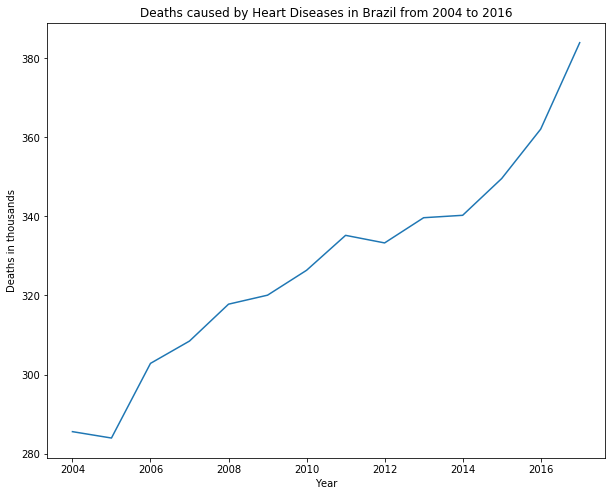

In [0]:
#@title Deaths caused by Heart Diseases in Brazil
fig, ax = plt.subplots(figsize=(10,8))

# plotting a line graph to represent deaths caused by heart disease in Brazil
ax.plot(df_brasil.ano, df_brasil.mortes_doencas_cardio);
ax.set_title("Deaths caused by Heart Diseases in Brazil from 2004 to 2016");
ax.set_xlabel("Year");
ax.set_ylabel("Deaths in thousands");

## Exploratory Data Analysis

Now it's time for us to explore our data and see what we can learn from it.

Here, we're going to check for variable types, see the statistical distribution of the numerical variables, check for missing values, visualize the data and much more.

When looking at our attributes we can identify that our **target** variable **'num'** has 5 possible values: [0,1,2,3,4].

However, following the majority of projects that used this dataset before, we'll consider only two possibilities:
  * 0 - No Heart Disease
  * 1 - Heart Disease
  
So, let's convert all values from 1-4 into 1.

In [0]:
# target variable before conversion
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converting values that are different than 0 into 2
df.loc[df.num != 0, 'num' ] = 1

In [0]:
# target variable after conversion
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

### Q1. How many attributes and entries are there in the dataset? What are the types of the variables?

In [0]:
# checking the 'face' of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
# checking variable types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

As we could see above, we're dealing with only numerical variables, which should help our statistical analysis of the dataset.

In [0]:
# statistical distribution of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


As stated before, [num] is our **target variable**, for being the one that indicates whether a patient has a heart disease or not.

With that in mind, let's see how many patients in this dataset have heart disease.

In [0]:
# checking for the number of patients with heart disease
print('0: No Heart Disease\n1: Heart Disease\n')
df.num.value_counts()

0: No Heart Disease
1: Heart Disease



0    164
1    139
Name: num, dtype: int64

### Q2. What's the percentage of missing values?

To make sure our analysis is precise, we need to check for missing values, and deal with them in case there are any.

In [0]:
# checking for missing values
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

num         0.0
thal        0.0
ca          0.0
slope       0.0
oldpeak     0.0
exang       0.0
thalach     0.0
restecg     0.0
fbs         0.0
chol        0.0
trestbps    0.0
cp          0.0
sex         0.0
age         0.0
dtype: float64

Since this dataset has been pre-processed, there are no missing values, which helps us in our analysis and *Machine Learning* models.

### Q3. Distributions and Correlations

To check correlations and distributions, let's work on our dataset a little more.

Patients by Sex:
 1.0    206
0.0     97
Name: sex, dtype: int64


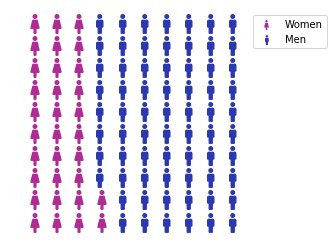

In [0]:
#@title Patients by sex

# waffle chart Patients by sex
from pywaffle import Waffle
data = df.sex.value_counts()
print('Patients by Sex:\n',data)
# plotting waffle chart
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=10,
                colors=("#AE2C94", "#2C39AE"),
                values={'Women': 97,
                        'Men': 206,
                        }, icons=('female','male'), icon_size=20,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

As we could see above, there are more men than women in the population of our dataset. Could there be any correlation between sex and heart disease? We'll find out soon.

**What's the impact of cholesterol on the patients?**

It's known that having high levels of cholesterol may increase your chances of having heart problems, such as heart attacks and strokes. For that reason, it's interesting for us to study our population and understand their cholesterol levels.

For reference, total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

Below, we find a scatter plot of the patients' ages and cholesterol levels.

As highlighted by the line, we can see that there is a correlation between being older and having higher cholesterol. That doesn't mean that young people won't have high levels of cholesterol, what it shows is that the line is ascending, which means that the further you age, the more likely you are to have high levels of cholesterol and, possibly, heart diseases.

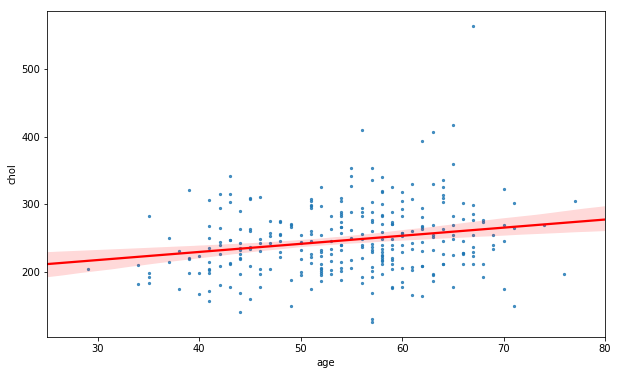

In [0]:
#@title Scatter Plot and Linear Regression on Age and Cholesterol Levels
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=25,right=80)
sns.regplot('age', 'chol', scatter_kws={"s": 5},
            line_kws={"color": "red"}, data=df, ax=ax);

Below, we can see that most of the patients have cholesterol levels higher than desirable. It should be interesting to check the correlation between cholesterol levels and whether the patience has a heart disease or not.

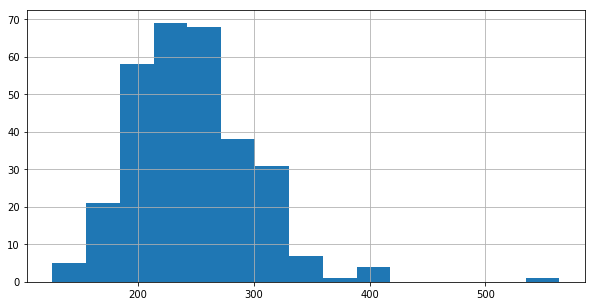

In [0]:
#@title Distribution of Cholesterol Levels
# distribution of cholesterol levels
df.chol.hist(bins=15, figsize=(10,5));
sns.set()

Let's take a better look at the distribution of the results of resting electrocardiographic exams.

In [0]:
# extracting the data into a dictionary
restecg = dict(df.restecg.value_counts())

# preparing the data for the pie chart
labels = restecg.keys()
sizes = restecg.values()
explode = (0.1, 0, 0)

As we can see below, the majority of the results revealed normal status, followed by patients having ST-T wave abnormality and a minority of the patients having probable or definite left ventricular hypertrophia by Estes' criteria.

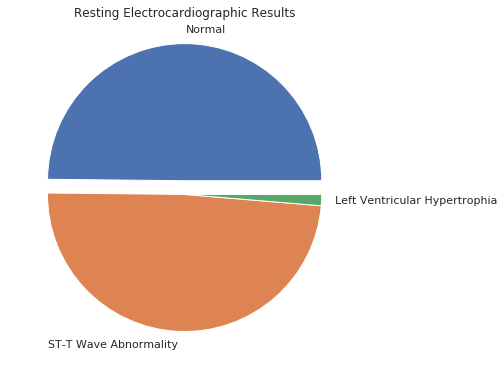

In [0]:
#@title Pie chart on Resting Electrocardiographic Results
# plotting a pie chart on Resting Electrocardiographic Results
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(sizes, labels=('Normal','ST-T Wave Abnormality', 'Left Ventricular Hypertrophia'), explode=explode, shadow=False)
ax.set_title("Resting Electrocardiographic Results")

plt.tight_layout()

With all of this information in mind, it's time to check and understand the correlations between the variables, and see which contribute more for heart diseases.

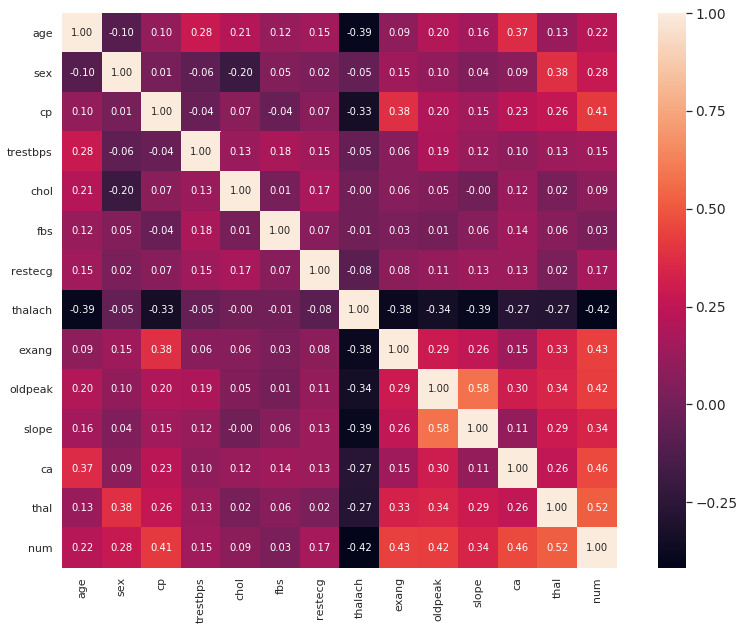

In [0]:
#@title Correlation Heatmap
# plotting a correlation heatmap
#fig, ax = plt.subplots(figsize=(10,6))

#sns.heatmap(df.corr(),
  #          vmax=1.0, linecolor='white', annot=True)
#plt.tight_layout()

f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.tight_layout()

### Exploratory Data Analysis Conclusions
After analyzing the dataset and visualizing the correlation heatmap, we can come to some conclusions:

* Mild correlation between Heart Disease and age, sex, cholesterol levels, resting electrocardiographic results and fasting blood sugar.
* High correlation between Heart Disease and thallium stress test, number of major vessels, slope of the peak exercise ST segment, exercise induced angina, and chest pain.

## Machine Learning - Predicting Heart Diseases


<center><img alt='AI'  width='40%'src="https://image.freepik.com/free-vector/digital-code-diagram-technology-artificial-intelligence_1017-11828.jpg"></center>


After analyzing and understanding our data, it's time to implement a *Machine Learning* model to predict whether a person is prone to having Heart Diseases or not.

For that, we'll use a algorithm called **XGBoost**. XGBoost stands for E**X**treme **G**radient **Boost**ing, and it belongs to the class of *Decision Trees*.

This algorithm has been breaking ground and is becoming one of the most used in Kaggle Competitions nowadays, and is a reference of precision and accuracy.

In [0]:
# importing the necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# checking first entries again
print("Size of the DataFrame: {}\n".format(df.shape))
df.head()

Size of the DataFrame: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


For our model to work, we need to split the dataset into training and testing datasets. To do that, we'll use *Scikit-Learn*.

After that, we'll create and train our model.

In [0]:
# determining X e y
X = df.drop('num', axis=1)
y = df['num']

# dividing the dataset between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# creating and training the model
ml_model = XGBClassifier(learning_rate=0.05, n_estimators=100,
                         max_depth=4, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

With our model created, it's time to measure its accuracy. For that, again, we'll use *Scikit-Learn* and its accuracy score.

To put it simply, our machine learning model will run through the test dataset, making predictions. After that, it will cross-reference these results with the dataset that has the actual results, thus, calculating its accuracy, and returning a score for the model.

In [0]:
# predictions and probabilities on the test dataset
y_pred = ml_model.predict(X_test)

# checking the performance of the algorithm
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))


Accuracy Score:
0.881578947368421


# Conclusions
After thoroughly analyzing the data, we were able to better understand the variables related to heart diseases.

With that knowledge, we were able to use a *Machine Learning* algorithm to make predictions that can help doctors diagnose patients with heart disease.

With the proper development and use, this kind of work can save lives!

Hope you found it interesting and educative.

<center><img width = '80%'src= "https://github.com/rafaelnduarte/Analysis_of_Violence_in_Rio_de_Janeiro/raw/master/img/rafaelnd_ds.png"></center>
